In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset0.csv')

In [2]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset['total_calls']=dataset['total_day_calls']+dataset['total_eve_calls']+dataset['total_night_calls']
dataset['total_minutes']=dataset['total_day_minutes']+dataset['total_eve_minutes']+dataset['total_night_minutes']
dataset['total_charges']=dataset['total_day_charge']+dataset['total_eve_charge']+dataset['total_night_charge']
dataset.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)
dataset['churn'] = dataset['churn'].replace({'no':0,'yes':1})
churn_column = dataset['churn']
dataset.drop('churn',axis=1,inplace=True)
dataset['churn'] = churn_column
###THIS SECTION IS DATASET SPECIFIC PROCESSING


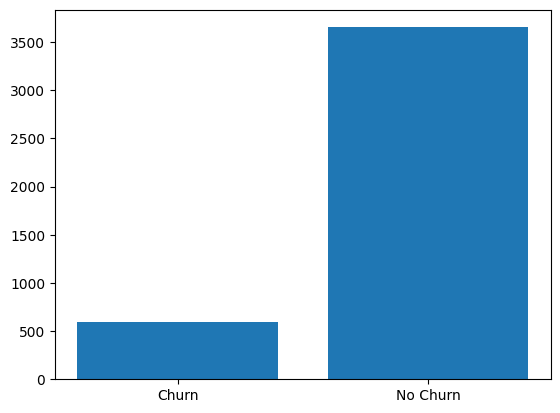

In [3]:
from pre_processor import PreProcessor


label_column = 'churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [4]:
binary_encode_columns=['state','area_code','international_plan','voice_mail_plan']
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']


In [5]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

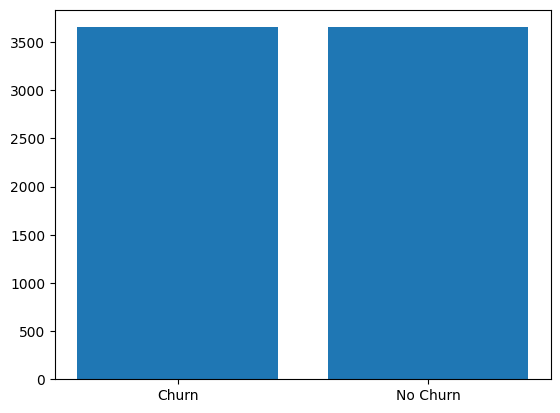

In [6]:
pre_processor.plot_imbalance()

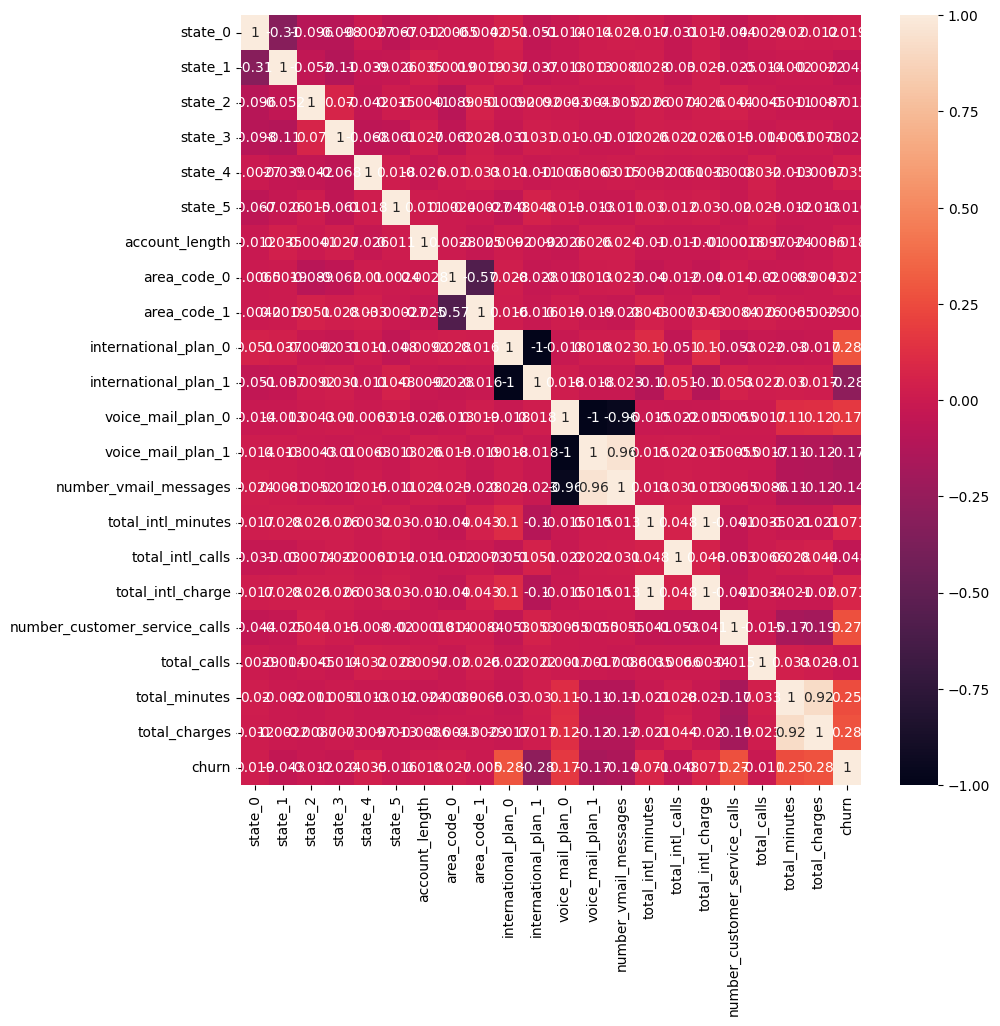

In [7]:
pre_processor.plot_correlation()

In [8]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.255756
number_customer_service_calls,0.164740
total_minutes,0.131506
international_plan_0,0.056108
total_intl_minutes,0.054422
international_plan_1,0.052597
total_intl_charge,0.049557
total_intl_calls,0.046541
account_length,0.042386
total_calls,0.042176


In [9]:
pre_processor.remove_features_by_importance(0.01)

In [10]:
pre_processor.split_features_labels()

In [11]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.252086
number_customer_service_calls,0.186126
total_minutes,0.146313
international_plan_1,0.064807
total_intl_calls,0.054757
total_intl_minutes,0.053617
total_intl_charge,0.052076
international_plan_0,0.048942
total_calls,0.044369
account_length,0.044215


In [12]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [13]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=1)

[I 2024-06-11 11:16:29,442] A new study created in memory with name: no-name-e2a07154-57c6-452b-be4b-ce1ff8df750a
[I 2024-06-11 11:16:31,306] Trial 0 finished with value: 0.9371891735120756 and parameters: {'n_estimators': 109, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9371891735120756.
[I 2024-06-11 11:16:31,307] A new study created in memory with name: no-name-e2c9da72-31e6-4492-9223-514bbeaaf75f
[I 2024-06-11 11:16:37,553] Trial 0 finished with value: 0.8841365703036198 and parameters: {'num_layers': 2, 'layer1_size': 62, 'layer2_size': 48, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.047796804695542344}. Best is trial 0 with value: 0.8841365703036198.
[I 2024-06-11 11:16:37,554] A new study created in memory with name: no-name-8afa1d44-6639-45eb-9c19-e48f5e8ae0d5
[I 2024-06-11 11:16:41,199] Trial 0 finished with value: 0.9570433985258446 and parameters: {'n_estimators': 38, 'learning_rate': 0.07073897981668258, 'max_depth': 

In [14]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       722
         1.0       0.99      0.88      0.93       739

    accuracy                           0.94      1461
   macro avg       0.94      0.94      0.94      1461
weighted avg       0.94      0.94      0.94      1461

Neural Network
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       722
         1.0       0.94      0.87      0.91       739

    accuracy                           0.91      1461
   macro avg       0.91      0.91      0.91      1461
weighted avg       0.91      0.91      0.91      1461

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       722
         1.0       0.99      0.91      0.95       739

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95    

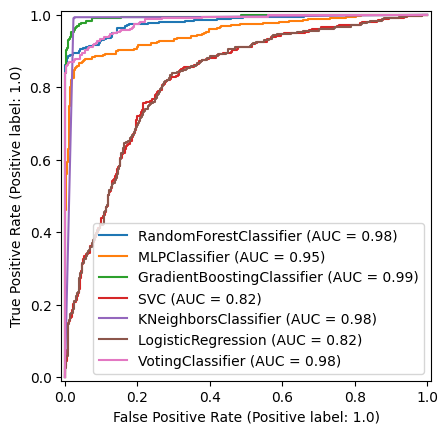

In [15]:
model_select.roc_curve()

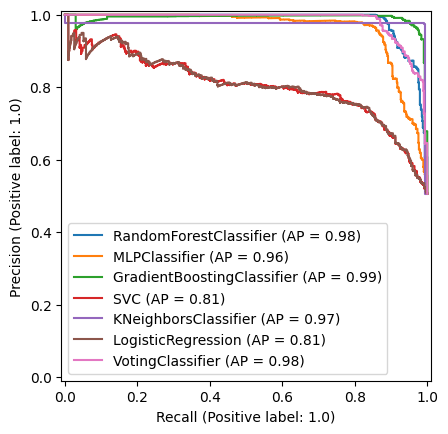

In [16]:
model_select.precision_recall_curve()

In [17]:
model_select.choose_best_model(model_select.rf_model)

In [18]:
model_select.calculate_max_f1_threshold_for_best_model()

{'max_f1_score': 0.9336188436830836, 'max_f1_threshold': 0.37373737373737376}

In [19]:
model_select.save_best_model()